In [1]:
import numpy as np
import matplotlib.pyplot as plt

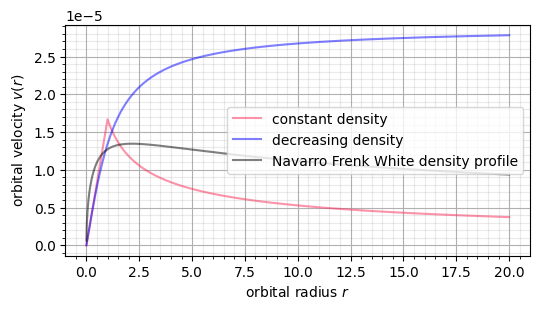

In [2]:
R_0 = 1
rho_0 = 1
G = 6.67e-11


# orbital velocity for a galaxy of constand mass density
def v_rho_const(r):
    if r < R_0:
        return np.sqrt(4*np.pi*G*rho_0 / 3) * r
    else:
        return np.sqrt(4*np.pi*G*rho_0 / 3 * R_0**3 / r)
    

# orbital velocity for a galaxy of decreasing mass density
def v_rho_decreasing(r):
    return np.sqrt(4*np.pi*G*rho_0*R_0**2  * (1 - R_0/r*np.arctan(r/R_0)))


# orbital velocity for the Navarro Frenk White density profile
def v_rho_NFW(r):
    return np.sqrt(4*np.pi*G*rho_0*R_0**3 / (r) * ( np.log((r+R_0)/R_0) - r/(R_0+r)) )


# data generation
r_array = np.linspace(0.001, 20, 1000)
v_rho_const_array = np.array([v_rho_const(r) for r in r_array])
v_rho_decreasing_array = np.array([v_rho_decreasing(r) for r in r_array])
v_rho_NFW_array = np.array([v_rho_NFW(r) for r in r_array])


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'orbital radius $r$') 
ax.set_ylabel(r'orbital velocity $v(r)$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(r_array, v_rho_const_array, color = "xkcd:red pink", alpha = 0.5, label = r"constant density")
ax.plot(r_array, v_rho_decreasing_array, color = "blue", alpha = 0.5, label = r"decreasing density")
ax.plot(r_array, v_rho_NFW_array, color = "black", alpha = 0.5, label = r"Navarro Frenk White density profile")

ax.legend()
ax.legend(loc="center right")


plt.savefig('AG.DMH_visualizations/orbital_velocity_over_r.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('AG.DMH_visualizations/orbital_velocity_over_r.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

In [5]:
r_UGC_128 = 1.3e21
M_visible_UGC_128 = 3.34e40
v_UGC_128 = 1.3e5

M_total_UGC_128 = r_UGC_128*v_UGC_128**2 / G
M_DM_UGC_128 = M_total_UGC_128 - M_visible_UGC_128
M_DM_UGC_128, M_DM_UGC_128 / M_total_UGC_128

(2.9598530734632682e+41, 0.8985989986345015)